# Aggregators

| | | |
|-|-|-|
|[ ![Creative Commons License](images/cc4.png)](http://creativecommons.org/licenses/by-nc/4.0/) |[ ![aGrUM](images/logoAgrum.png)](https://agrum.org) |[ ![interactive online version](images/atbinder.svg)](https://agrum.gitlab.io/extra/agrum_at_binder.html)

Aggregators are special type of nodes that includes a generic CPT for any numbers of parents.

*pyAgrum* proposes a list of such aggregators. Some of then are used below.

In [1]:
import numpy as np

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


In [2]:
min_x=0
max_x=15

bn=gum.BayesNet()
l=[bn.add(gum.RangeVariable(item,item,min_x,max_x)) for item in ["a","b","c","d","e","f"]]

gum.config['notebook','histogram_line_threshold']=15

In [3]:
nmax=bn.addMAX(gum.RangeVariable("MAX","MAX",min_x,max_x))
bn.addArc(l[0],nmax)
bn.addArc(l[1],nmax)
bn.addArc(l[2],nmax)

nmin=bn.addMIN(gum.RangeVariable("MIN","MIN",min_x,max_x))
bn.addArc(l[3],nmin)
bn.addArc(l[4],nmin)
bn.addArc(l[5],nmin)

nampl=bn.addAMPLITUDE(gum.RangeVariable("DELTA","DELTA",0,max_x-min_x))
bn.addArc(nmax,nampl)
bn.addArc(nmin,nampl)

nmedian=bn.addMEDIAN(gum.RangeVariable("MEDIAN","MEDIAN",min_x,max_x))
for n in [l[0],l[1],l[2],l[3]]:
    bn.addArc(n,nmedian)
#potential for median has a size : 16^5=2^20 double !

nexists=bn.addEXISTS(gum.LabelizedVariable("EXISTS_0","EXISTS"),0)
bn.addArc(l[0],nexists)
bn.addArc(l[1],nexists)
bn.addArc(l[2],nexists)

nforall=bn.addFORALL(gum.LabelizedVariable("FORALL_1","FORALL"),1)
bn.addArc(l[3],nforall)
bn.addArc(l[4],nforall)
bn.addArc(l[5],nforall)

ncount=bn.addCOUNT(gum.RangeVariable("COUNT_1","COUNT_1,",0,3),1)
bn.addArc(l[0],ncount)
bn.addArc(l[1],ncount)
bn.addArc(l[2],ncount)

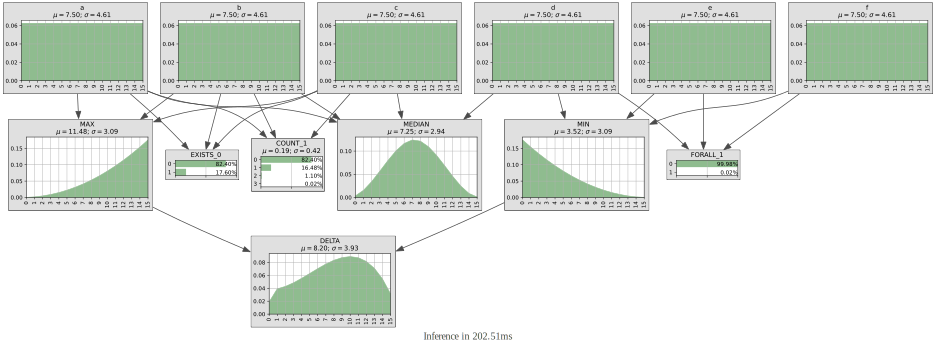

In [4]:
for nod in l:
    bn.cpt(nod).fillWith(1).normalize()
gnb.showInference(bn,size="13")

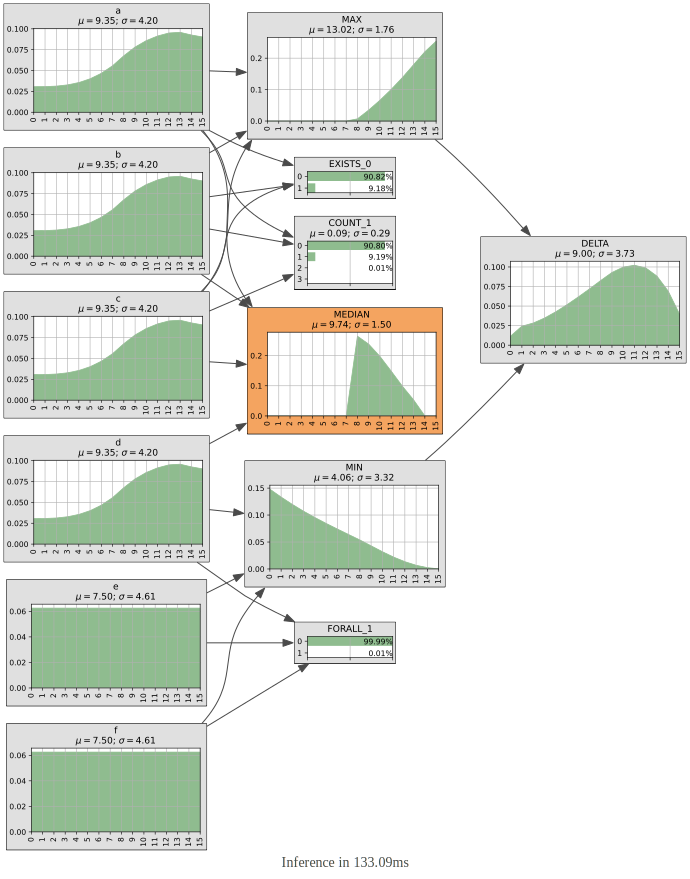

In [5]:
# dot | neato | fdp | sfdp | twopi | circo | osage | patchwork
gum.config["notebook", "graph_rankdir"]="LR"
gnb.showInference(bn,size="13",evs={'MEDIAN':[0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0]})
gum.config.reset()

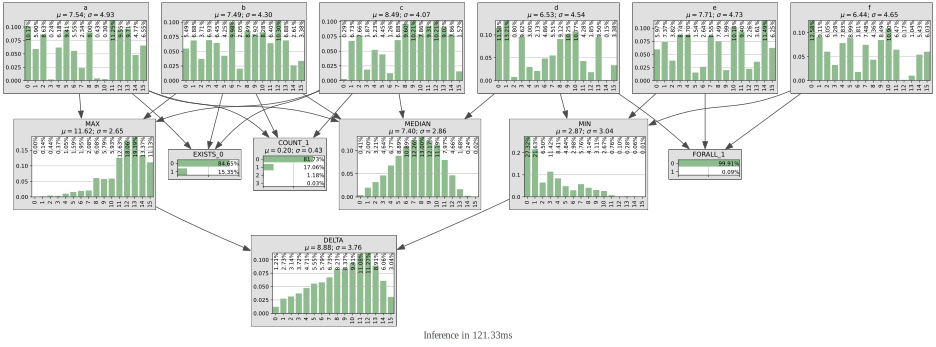

In [6]:
# if the roots do not have uniform but random distribution
for nod in l:
    bn.generateCPT(nod)
   
gnb.showInference(bn,size="13")

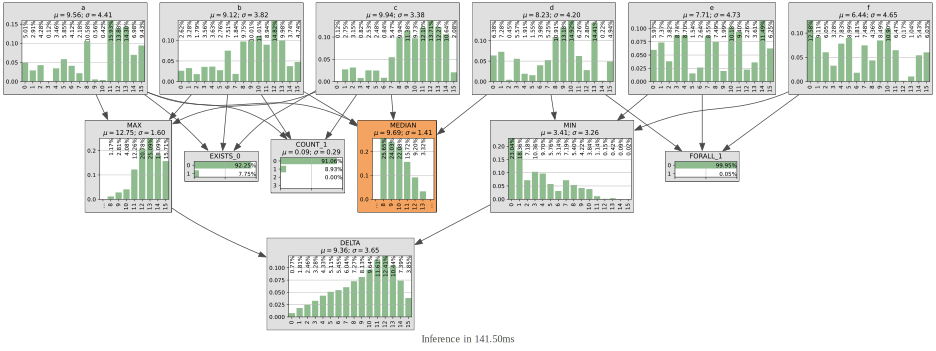

In [7]:
gnb.showInference(bn,size="13",evs={'MEDIAN':[0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0]})